# ISM Manufacturing PMI

ISM Manufacturing PMI reflects business conditions in the US manufacturing sector in the specified month. The Institute of Supply Management (ISM) is a not-for-profit supply management organization in the United States, which has over 40,000 members.

The index is calculated based on a survey of representatives of several hundred companies from 18 US industries. Unlike Markit, ISM considers not only private companies but is based on the common NAICS (North American Industrial Classification System) list. Respondents describe the following aspects of their economic activity:

- New orders received from clients
- Output (speed and level)
- Suppliers' delivery times (whether delivery performance is faster or slower)
- Company's inventories
- Customers' stocks (an approximate estimate of stocks stored by company's clients)
- Prices, whether the company is paying for products and services more or less
- Backlog of orders (increasing or decreasing)
- New export orders, i.e. the number of orders received for further export
- Imports — amount of imported materials
- Employment in the company

The questionnaire features relative estimates: whether the situation is better, worse or has not changed. Responses are estimated taking into account weights of respondent companies.

The values are seasonally adjusted. The resulting manufacturing PMI is a composite of five diffuse indices with different weights (New orders, Output, Employment, Supplies and Inventories).

Readings above 50 point to improvements in the industry situation. Index below 50 is an indication of contraction in economic conditions of production. The further the value moves from the mark of 50, the greater the rate of situation change.

Manufacturing PMI is **one of the most important indicators of economic health**. Although the manufacturing sector is not a very important component of national GDP, it is still an early **indicator of a coming recession or growth**. **Purchasing managers are among the first to know** when the market conditions change, since they work in the short term and can evaluate a trend towards changing economic conditions. The index is released earlier than GDP and reports from the Bureau of Labor Statistics, therefore it is a leading indicator.

Manufacturing PMI growth is usually seen as positive for the US dollar.
                
## Source
- https://www.mql5.com/en/economic-calendar/united-states/ism-manufacturing-pmi

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISM-Manufacturing-PMI" data-toc-modified-id="ISM-Manufacturing-PMI-1">ISM Manufacturing PMI</a></span><ul class="toc-item"><li><span><a href="#Source" data-toc-modified-id="Source-1.1">Source</a></span></li></ul></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.1">Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-4">Rata Die</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-5">Draw Plots</a></span></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-6">Extract only the desired data</a></span></li><li><span><a href="#Quantize-(normalize)-the-data" data-toc-modified-id="Quantize-(normalize)-the-data-7">Quantize (normalize) the data</a></span></li><li><span><a href="#Fill-Empty-Dates" data-toc-modified-id="Fill-Empty-Dates-8">Fill Empty Dates</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-9">Averages</a></span></li><li><span><a href="#Position-on-given-Date" data-toc-modified-id="Position-on-given-Date-10">Position on given Date</a></span></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-11">Save DataFrame to CSV file</a></span></li></ul></div>

# Set Up

In [1]:
show_help = false
include("MarketIndicators.jl") 
println()

# Read Data

In [2]:
#data = available_datasets() # uncomment to see all available datasets

In [3]:
#data = available_datasets() # uncomment to see all available datasets

dataset_file_name = "united-states.ism-manufacturing-pmi.csv"
df = fetch_dataset(dataset_file_name, "yyyy.mm.dd") #2019.10.01
record_count = size(df)[1]
println("data dimentions: ", size(df) )

using Statistics
describe(df)

data dimentions: (164, 4)


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Date,,2007-03-01,,2020-10-01,164,,Date
2,ActualValue,52.8652,32.4,53.1,61.4,,,Float64
3,ForecastValue,54.539,47.5,54.1,62.7,,123,"Union{Missing, Float64}"
4,PreviousValue,52.8589,32.4,53.2,61.4,,1,"Union{Missing, Float64}"


## Sample the data

In [4]:
columns = preview_data(df) # uncomment to see the data
println()

12×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2007-03-01 │ 52.3        │ missing       │ missing       │
│ 2   │ 2008-05-01 │ 48.6        │ missing       │ 48.6          │
│ 3   │ 2009-07-01 │ 44.8        │ missing       │ 42.8          │
│ 4   │ 2010-09-01 │ 56.3        │ missing       │ 55.5          │
│ 5   │ 2011-11-01 │ 51.8        │ missing       │ 52.5          │
│ 6   │ 2013-01-02 │ 50.2        │ missing       │ 49.5          │
│ 7   │ 2014-03-03 │ 53.2        │ missing       │ 51.3          │
│ 8   │ 2015-05-01 │ 51.5        │ missing       │ 51.5          │
│ 9   │ 2016-07-01 │ 53.2        │ missing       │ 51.3          │
│ 10  │ 2017-09-01 │ 58.8        │ 57.4          │ 56.3          │
│ 11  │ 2018-11-01 │ 57.7        │ 60.6          │ 59.8          │
│ 12  │ 2020-01-03 │ 47.2        │ 48.3        

# Rata Die

In [5]:
insert!(df, 1, zeros(Int64, record_count), :Rata_Die)
update_rata_die!(df, 1, 2)

columns = preview_data(df)
println()

12×5 DataFrame
│ Row │ Rata_Die │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Int64    │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼──────────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 732736   │ 2007-03-01 │ 52.3        │ missing       │ missing       │
│ 2   │ 733163   │ 2008-05-01 │ 48.6        │ missing       │ 48.6          │
│ 3   │ 733589   │ 2009-07-01 │ 44.8        │ missing       │ 42.8          │
│ 4   │ 734016   │ 2010-09-01 │ 56.3        │ missing       │ 55.5          │
│ 5   │ 734442   │ 2011-11-01 │ 51.8        │ missing       │ 52.5          │
│ 6   │ 734870   │ 2013-01-02 │ 50.2        │ missing       │ 49.5          │
│ 7   │ 735295   │ 2014-03-03 │ 53.2        │ missing       │ 51.3          │
│ 8   │ 735719   │ 2015-05-01 │ 51.5        │ missing       │ 51.5          │
│ 9   │ 736146   │ 2016-07-01 │ 53.2        │ missing       │ 51.3          │
│ 10  │ 736573   │ 2017-09-01 │ 58.8        │ 57.

# Draw Plots

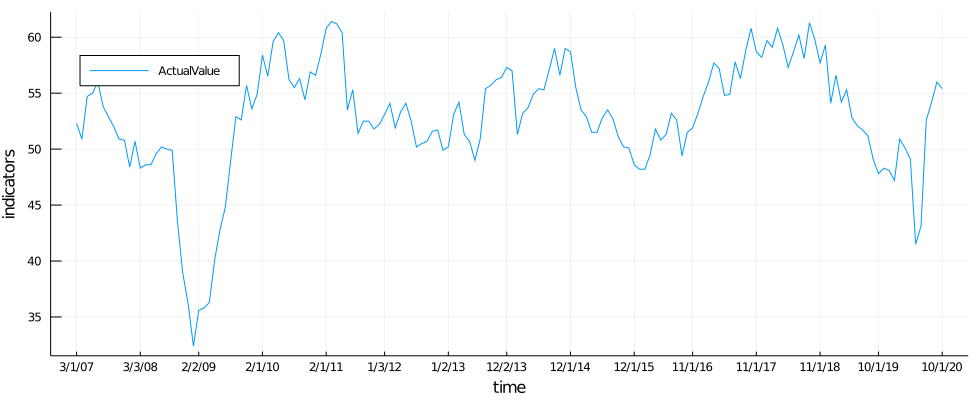

In [6]:
using Plots

record_count = size(df)[1]
rows = 1:record_count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3]   "" ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Extract only the desired data

In [7]:
using DataFrames
df = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                Price = df[:,3]
               )

columns = preview_data(df)
println()

12×3 DataFrame
│ Row │ Day    │ Date       │ Price   │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 732736 │ 2007-03-01 │ 52.3    │
│ 2   │ 733163 │ 2008-05-01 │ 48.6    │
│ 3   │ 733589 │ 2009-07-01 │ 44.8    │
│ 4   │ 734016 │ 2010-09-01 │ 56.3    │
│ 5   │ 734442 │ 2011-11-01 │ 51.8    │
│ 6   │ 734870 │ 2013-01-02 │ 50.2    │
│ 7   │ 735295 │ 2014-03-03 │ 53.2    │
│ 8   │ 735719 │ 2015-05-01 │ 51.5    │
│ 9   │ 736146 │ 2016-07-01 │ 53.2    │
│ 10  │ 736573 │ 2017-09-01 │ 58.8    │
│ 11  │ 736999 │ 2018-11-01 │ 57.7    │
│ 12  │ 737427 │ 2020-01-03 │ 47.2    │
 Dataset dimentions: (164, 3)

 Column numbering:
1 Day
2 Date
3 Price



# Quantize (normalize) the data

In [8]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -1.1172413793103448
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 32.4
maximum = 61.4
Save these values for later to run model preditions
12×3 DataFrame
│ Row │ Day    │ Date       │ Price   │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 732736 │ 2007-03-01 │ 47.0    │
│ 2   │ 733163 │ 2008-05-01 │ 14.0    │
│ 3   │ 733589 │ 2009-07-01 │ -19.0   │
│ 4   │ 734016 │ 2010-09-01 │ 82.0    │
│ 5   │ 734442 │ 2011-11-01 │ 43.0    │
│ 6   │ 734870 │ 2013-01-02 │ 29.0    │
│ 7   │ 735295 │ 2014-03-03 │ 55.0    │
│ 8   │ 735719 │ 2015-05-01 │ 40.0    │
│ 9   │ 736146 │ 2016-07-01 │ 55.0    │
│ 10  │ 736573 │ 2017-09-01 │ 104.0   │
│ 11  │ 736999 │ 2018-11-01 │ 94.0    │
│ 12  │ 737427 │ 2020-01-03 │ 2.0     │
 Dataset dimentions: (164, 3)

 Column numbering:
1 Day
2 Date
3 Price



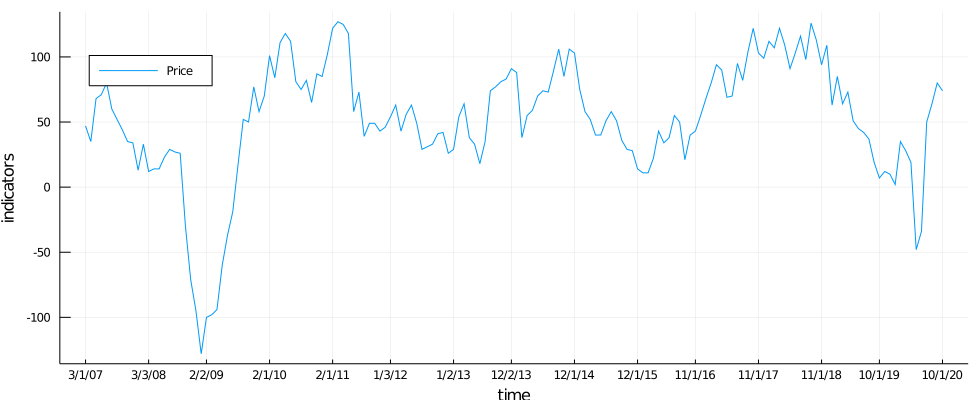

In [9]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3] ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Fill Empty Dates

In [10]:
for i in 1:count-1
    day_this = df[i,1]
    day_next = df[i+1,1]
    
    value = df[i,3] # assuming that the last known value is still valid
    
    # loop thru all days you need to insert
    # if there is no gap, nothing will happen
    for day in day_this+1:day_next-1
        date_string = rata2datetime(day) # Dates.format(rata2datetime(day), "yyyy-mm-dd")
        push!(df, [ day date_string value ])
    end
    
end

sort!(df, [:Day]);
count = size(df)[1]
columns = preview_data(df)
println()

12×3 DataFrame
│ Row │ Day    │ Date       │ Price   │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 732736 │ 2007-03-01 │ 47.0    │
│ 2   │ 733150 │ 2008-04-18 │ 14.0    │
│ 3   │ 733564 │ 2009-06-06 │ -37.0   │
│ 4   │ 733978 │ 2010-07-25 │ 81.0    │
│ 5   │ 734392 │ 2011-09-12 │ 49.0    │
│ 6   │ 734806 │ 2012-10-30 │ 41.0    │
│ 7   │ 735220 │ 2013-12-18 │ 91.0    │
│ 8   │ 735634 │ 2015-02-05 │ 58.0    │
│ 9   │ 736048 │ 2016-03-25 │ 22.0    │
│ 10  │ 736462 │ 2017-05-13 │ 69.0    │
│ 11  │ 736876 │ 2018-07-01 │ 103.0   │
│ 12  │ 737290 │ 2019-08-19 │ 37.0    │
 Dataset dimentions: (4964, 3)

 Column numbering:
1 Day
2 Date
3 Price



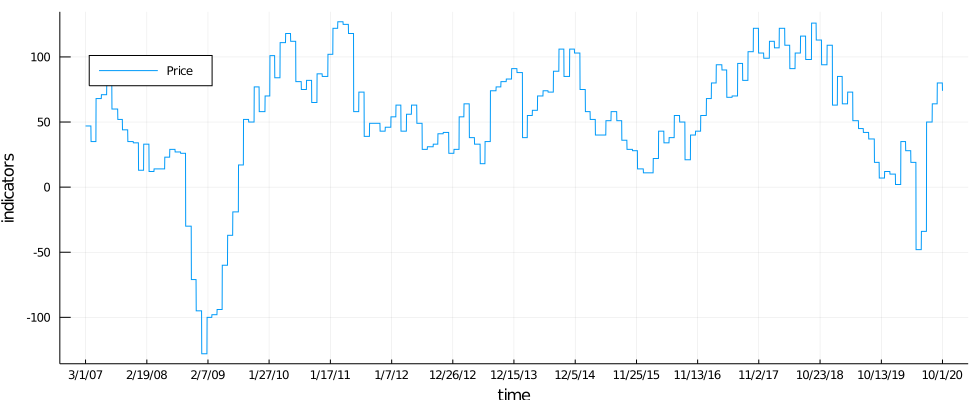

In [11]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [ columns[3]    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Averages

In [12]:
averages005 = calculate_average(df, 5, 3)
averages030 = calculate_average(df, 30, 3)
averages090 = calculate_average(df, 90, 3)
averages180 = calculate_average(df, 180, 3)
averages365 = calculate_average(df, 365, 3)
println()

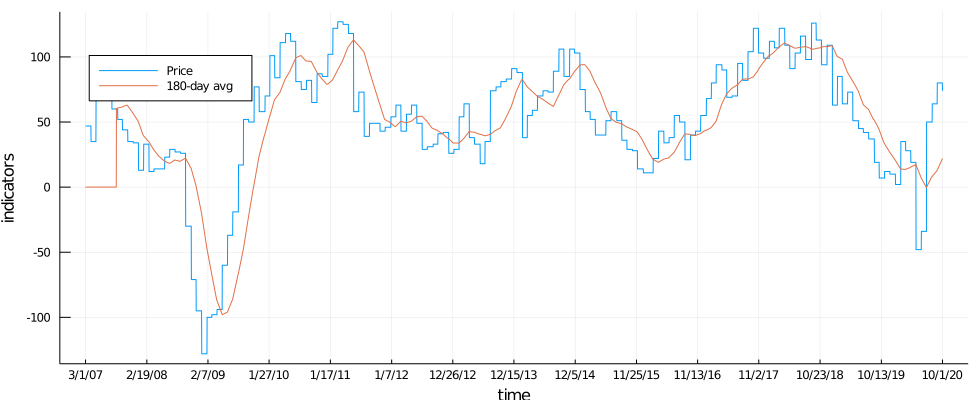

In [13]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot!(          dates, # x-axis: dates
               [  averages180    ], # y-axis
    label    = [ "180-day avg"    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

In [14]:
insertcols!(df, 4,  :Avg005 => averages005, makeunique=true)
insertcols!(df, 5,  :Avg030 => averages030, makeunique=true)
insertcols!(df, 6,  :Avg090 => averages090, makeunique=true)
insertcols!(df, 7,  :Avg180 => averages180, makeunique=true)
insertcols!(df, 8,  :Avg365 => averages365, makeunique=true)
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,735218.0,732736,735218.0,737699,,,Int64
2,Date,,2007-03-01,,2020-10-01,4964,,Date
3,Price,51.7921,-128.0,54.0,127.0,,,Float64
4,Avg005,51.7419,-128.0,54.0,127.0,,,Float64
5,Avg030,51.4223,-128.0,53.2,127.0,,,Float64
6,Avg090,50.744,-108.92,52.42,124.76,,,Float64
7,Avg180,50.0308,-97.87,50.435,113.12,,,Float64
8,Avg365,48.8337,-57.18,51.295,108.68,,,Float64


# Position on given Date

In [15]:
position = position_on_date(df, "2020-09-30")
position[1:3]

LoadError: BoundsError: attempt to access 0-element Array{Float64,1} at index [1]

In [16]:
using Plots
count = size(df)[1]
rows = count-30:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(      dates, # x-axis: dates
        [  df[rows,3] position[rows] averages005[rows] averages030[rows] averages090[rows] averages180[rows] averages365[rows] ], # y-axis
    label    = 
        [ columns[3] "position" "5-day avg" "30-day avg" "90-day avg" "180-day avg" "365-day avg" ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

LoadError: MethodError: no method matching getindex(::typeof(position), ::UnitRange{Int64})

[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [17]:
save_dataset(df, dataset_file_name);